In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
import pandas as pd
import pandas_profiling

c:\Users\Ankith\insurance__premium_ml_prediction\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
df=pd.read_csv(r"C:\Users\Ankith\Downloads\insurance.csv")
df

age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]

In [11]:
pandas_profiling.ProfileReport(df)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.55s/it]


In [86]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [87]:
df["age_category"] = pd.cut(
                df["age"],
                bins=[0.0, 20.0, 30.0, 40.0, 50.0, np.inf],
                labels=[1,2,3,4,5]
            )

In [88]:
df['age_category'].unique()

[1, 2, 3, 4, 5]
Categories (5, int64): [1 < 2 < 3 < 4 < 5]

In [14]:
df.shape

(1338, 7)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 All the features have no missing value or any null value

c:\Users\Ankith\insurance__premium_ml_prediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


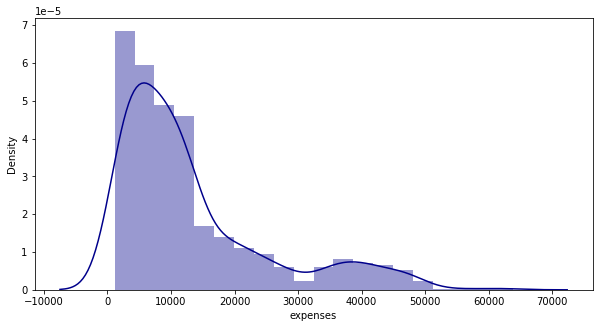

In [19]:
plt.figure(figsize=(10,5))
#sns.set_style(rc=)
sns.distplot(df['expenses'],bins=20,color='darkblue')
plt.show()

Distribution of the expenses dataset is not normally distributed but its right skewed

c:\Users\Ankith\insurance__premium_ml_prediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


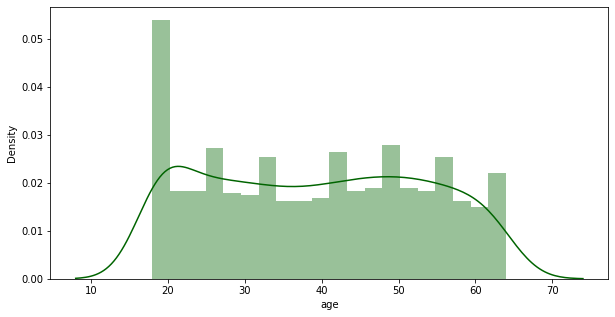

In [22]:
plt.figure(figsize=(10,5))
sns.distplot(df['age'],bins=20,color='darkgreen')
plt.show()


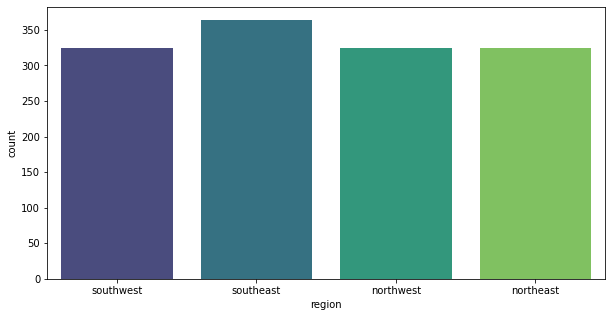

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['region'],palette='viridis')
plt.show()

In [27]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

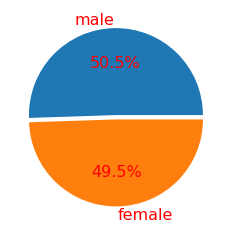

In [52]:
plt.pie(df['sex'].value_counts(),textprops = {'color': 'red','fontsize':16},explode=(0,0.05),labels=['male','female'],autopct='%.1f%%')
plt.setp(['male','female'])


 Not much difference between the male and female insurance buyers 

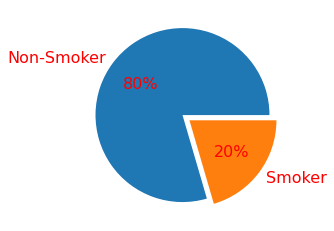

In [51]:
plt.pie(df['smoker'].value_counts(),explode=(0,0.1),textprops = {'color': 'red','fontsize':16},labels=['Non-Smoker','Smoker'],autopct='%.0f%%')
plt.show()

Smokers propotion among total applicants is less as compared to non-smokers

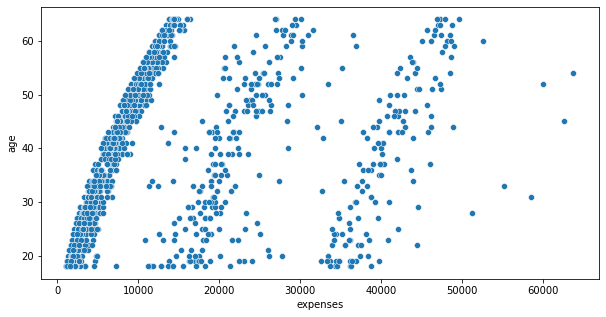

In [53]:
plt.figure(figsize=(10,5))
sns.scatterplot(y=df['age'],x=df['expenses'],palette='viridis')
plt.show()

 As the graph between age and expenses linearly increases with increase in the expenses

 YOUNGER Insurance applicants have lower expenses than the older Insurance appliacants

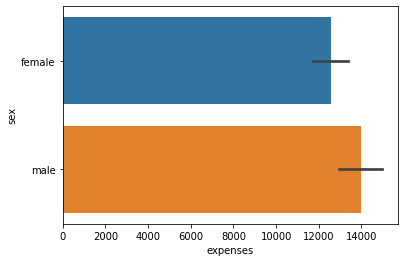

In [60]:
sns.barplot(x='expenses',y='sex',data=df)
plt.show()

The  Male applicants have more expenses as compared to female applicants

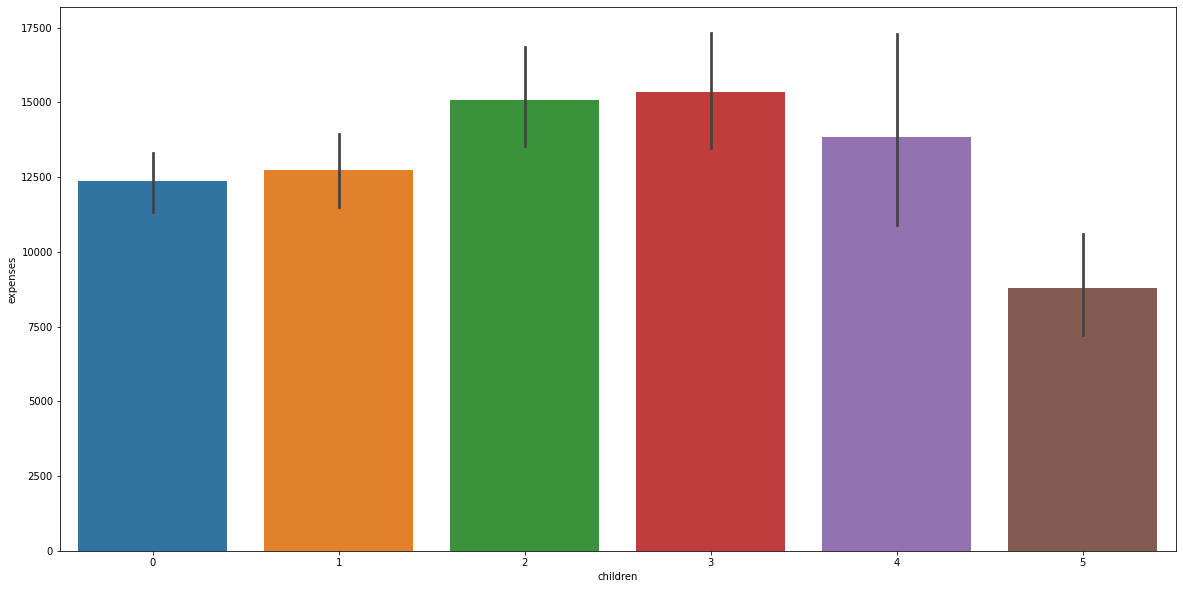

In [62]:
plt.figure(figsize=(20,10))
sns.barplot(x='children',y='expenses',data=df)
plt.show()

c:\Users\Ankith\insurance__premium_ml_prediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


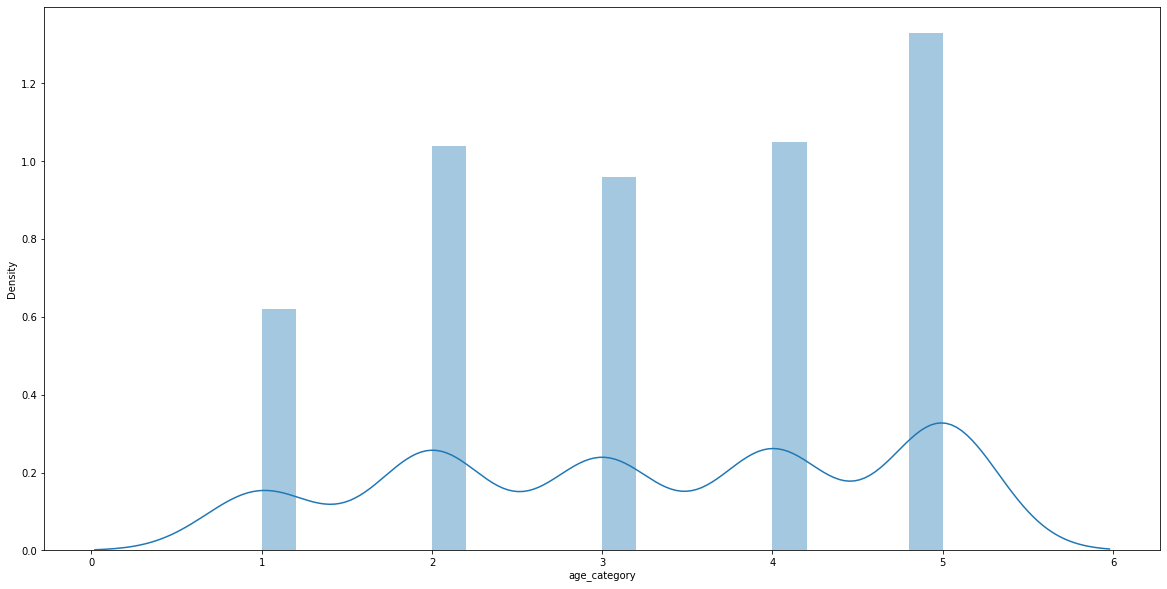

In [89]:
plt.figure(figsize=(20,10))
sns.distplot(df['age_category'],bins=20)
plt.show()

The distribution of the ages of Applicants are almost equally distributted among different age groups

c:\Users\Ankith\insurance__premium_ml_prediction\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


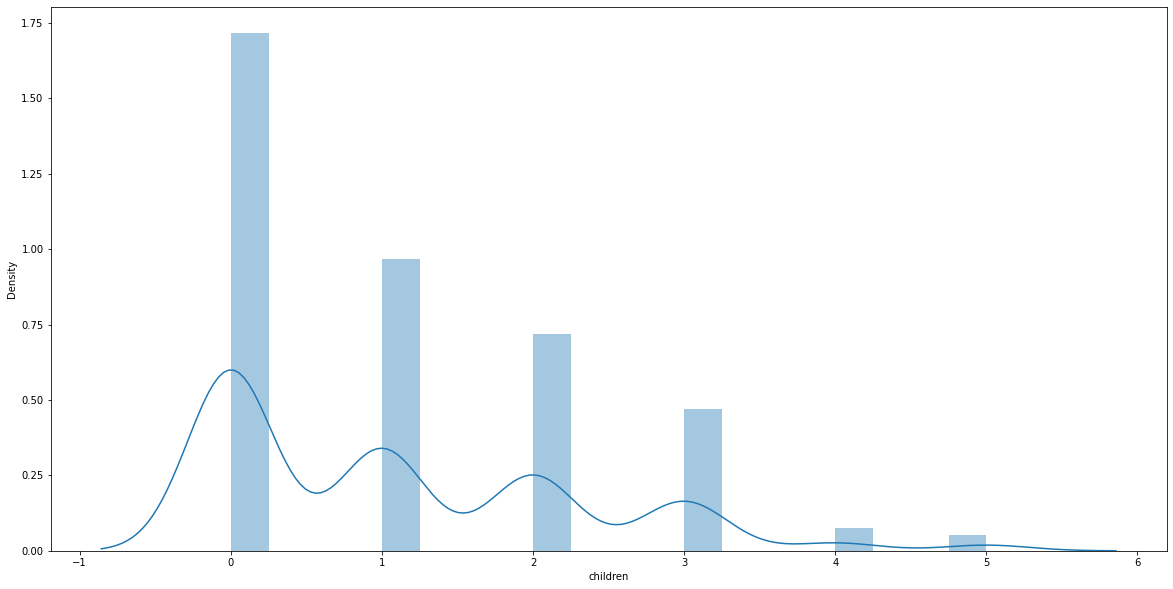

In [80]:
plt.figure(figsize=(20,10))
sns.distplot(df['children'],bins=20)
plt.show()

 Though less in number compared to the people with no children the applicants with 2 or more children are found to be having more expenses than the rest.

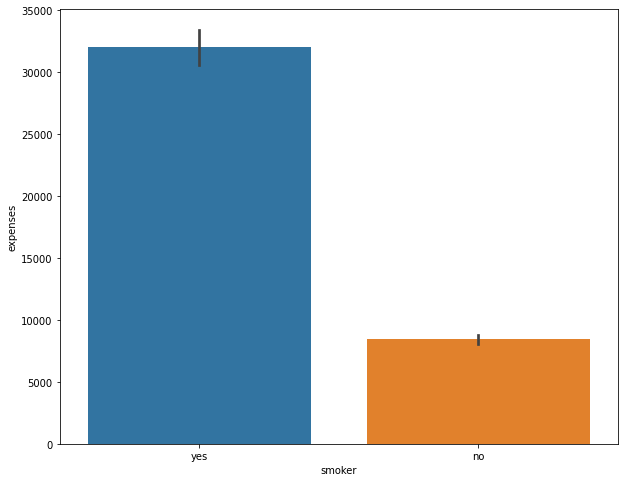

In [82]:
plt.figure(figsize=(10,8))
sns.barplot(x='smoker',y='expenses',data=df)
plt.show()

The smokers despite being less in number are found to be having higher expenses than the non-smokers

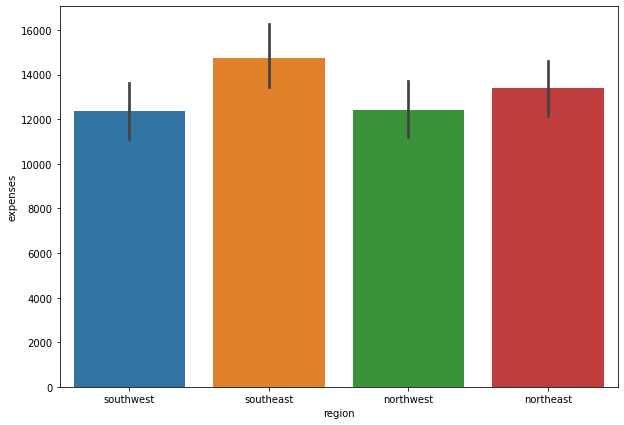

In [77]:
plt.figure(figsize=(10,7))
sns.barplot(x='region',y='expenses',data=df)
plt.show()

 Applicants in southeast region have higher expenses as compared to the applicants from other regions

<AxesSubplot:>

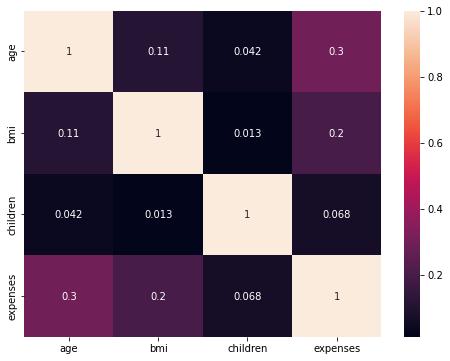

In [84]:
corr = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True)

No particular co-relation between features is significantly higher. Thus we can use all the features